# 02_RQ1_failure_patterns

In [1]:
import pandas as pd

pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")
pr_reviews_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_reviews.parquet")
pr_review_comments_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_review_comments_v2.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

c:\Users\fitr\Syncthing\School\MDS\Block3\DATA542\aidev-pr-rejections\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pr_df.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625


In [3]:
# identify ai-generated PRs
agent_prs = pr_df[pr_df["agent"].notnull()]

In [4]:
# identify rejection vs merge outcome
agent_prs["is_rejected"] = agent_prs["merged_at"].isna()

agent_prs.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url,is_rejected
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911,True
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2,False
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30,False
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...,False
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625,True


In [5]:
pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n..."
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im..."
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i..."
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt..."


In [6]:
# extract patch related features
patch = pr_commit_details_df.groupby("pr_id").agg({
    "filename": "count",
    "additions": "sum",
    "deletions": "sum"
}).rename(columns={"filename": "num_files"})

patch.head()

,num_files,additions,deletions
pr_id,,,
2756921963,74,848.0,344.0
2757103560,33,517.0,262.0
2757124156,1,1.0,1.0
2757125491,1,1.0,1.0
2757179026,21,1633.0,169.0


In [7]:
import re

# detect risky folders
pr_commit_details_df["is_risky"] = pr_commit_details_df["filename"].str.extract(
    r"(security|auth|config|crypto)", flags=re.IGNORECASE
).notna()

pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch,is_risky
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n...",False
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im...",False
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None,False
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i...",False
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt...",False


In [8]:
risky = pr_commit_details_df.groupby("pr_id")["is_risky"].any()
patch["touches_risky"] = risky

patch.head()

,num_files,additions,deletions,touches_risky
pr_id,,,,
2756921963,74,848.0,344.0,False
2757103560,33,517.0,262.0,True
2757124156,1,1.0,1.0,False
2757125491,1,1.0,1.0,False
2757179026,21,1633.0,169.0,False


In [9]:
# join to attach pr_id to each comment
pr_review_comments_df = pr_review_comments_df.merge(
    pr_reviews_df[["id", "pr_id"]],
    left_on="pull_request_review_id",
    right_on="id",
    how="left",
    suffixes=("", "_review")
)

In [10]:
# extract reviewer comment categories

def classify_comment(text):
    text = text.lower()
    if "test" in text or "coverage" in text:
        return "tests"
    if "incorrect" in text or "bug" in text or "logic" in text:
        return "correctness"
    if "style" in text or "format" in text:
        return "style"
    if "security" in text or "vulnerability" in text:
        return "security"
    return "other"

pr_review_comments_df["category"] = pr_review_comments_df["body"].fillna("").apply(classify_comment)

In [11]:
pr_review_comments_df.head()

,id,pull_request_review_id,user,user_type,diff_hunk,path,position,original_position,commit_id,original_commit_id,body,pull_request_url,created_at,updated_at,in_reply_to_id,id_review,pr_id,category
0,2110791802,2873410389,Copilot,Bot,"@@ -80,4 +81,7 @@ export const giselleEngine =...",apps/studio.giselles.ai/app/giselle-engine.ts,12.0,12,129ddeeabb303c5e20473132b83507120cb4cfc4,6f6b42ee11f2b2b3bdcc855b9871ba48d9be25bc,[nitpick] Consider adding documentation or a c...,https://api.github.com/repos/giselles-ai/gisel...,2025-05-28T03:04:12Z,2025-05-28T03:04:13Z,NaN,2873410389,3079303421,other
1,2200843160,3010483959,dpgeorge,User,"@@ -56,6 +56,14 @@\n #define PHY_SPEED_100FULL...",ports/stm32/eth_phy.h,NaN,4,47bace5680b27e235dc5d06ee5c3adff54079d7d,05231c28d4ac24eac705507ce6b50e6e504e76d0,These constants aren't used anywhere.,https://api.github.com/repos/micropython/micro...,2025-07-11T14:09:34Z,2025-07-11T14:09:34Z,NaN,3010483959,3201567268,other
2,2137612457,2913085976,jurasic-pf,User,"@@ -0,0 +1,294 @@\n+// SPDX-FileCopyrightText:...",src/vmecpp/cpp/vmecpp/vmec/vmec_constants/vmec...,NaN,48,a7797dc5ccbee0541708f452d7b0e63bc6912bf4,e71a34ef0b09bc8994974a5b70d1de8c65d57858,Have we formally decided for/against using spe...,https://api.github.com/repos/proximafusion/vme...,2025-06-10T11:08:27Z,2025-06-10T11:08:28Z,NaN,2913085976,3132739442,other
3,2100038023,2857335398,peterdeme,User,"@@ -46,8 +47,8 @@ var flagMethod = &cli.String...",internal/cmd/profile/flags.go,NaN,39,6b1fe4fe29308e414c4aa71988dec11379dec3ce,7d6ba7bc342722ee0dbce5cd2990e6b8ef751f17,✅,https://api.github.com/repos/spacelift-io/spac...,2025-05-21T11:27:55Z,2025-05-21T11:27:55Z,2.099688e+09,2857335398,3078006902,other
4,2141214307,2918905411,coderabbitai[bot],Bot,"@@ -100,9 +100,10 @@ export const mineHandler ...",packages/actions/src/Mine/mineHandler.js,10.0,10,50322e8c8ce33d71d65ace651b3ac7aa314f0456,d24ed162cd79404c18c12f4317115bf504a1cb89,_⚠️ Potential issue_\n\n**`mempoolTx` may be `...,https://api.github.com/repos/evmts/tevm-monore...,2025-06-11T22:30:58Z,2025-06-11T22:30:59Z,NaN,2918905411,3138264959,tests


In [12]:
# aggregate to PR-level frequencies
comment_stats = pr_review_comments_df.groupby(["pr_id", "category"]).size().unstack(fill_value=0)

comment_stats.head()

category,correctness,other,security,style,tests
pr_id,,,,,
2756921963,4,0,0,0,26
2758636941,0,1,0,0,0
2760266883,0,1,0,0,0
2761288801,0,2,0,0,0
2761577144,0,2,0,0,0


In [13]:
# join everything into a single table
df = (
    agent_prs[["id", "is_rejected"]]
    .merge(patch, left_on="id", right_index=True, how="left")
    .merge(comment_stats, left_on="id", right_index=True, how="left")
    .fillna(0)
)

df.head()

,id,is_rejected,num_files,additions,deletions,touches_risky,correctness,other,security,style,tests
0,3264933329,True,3.0,394.0,2.0,False,0.0,0.0,0.0,0.0,0.0
1,3265118634,False,11.0,38.0,38.0,False,0.0,0.0,0.0,0.0,0.0
2,3265640341,False,9.0,298.0,109.0,False,1.0,1.0,0.0,0.0,0.0
3,3265709660,False,18.0,288.0,12.0,False,0.0,2.0,0.0,0.0,0.0
4,3265782173,True,21.0,53.0,168.0,False,0.0,0.0,0.0,0.0,0.0


In [14]:
# frequency analysis to see common failure patterns
rejected = df[df["is_rejected"] == True]
rejected_comment_counts = rejected[comment_stats.columns].sum()
print(rejected_comment_counts)

correctness     727.0
other          6359.0
security        250.0
style           526.0
tests          1665.0
dtype: float64


<Axes: >

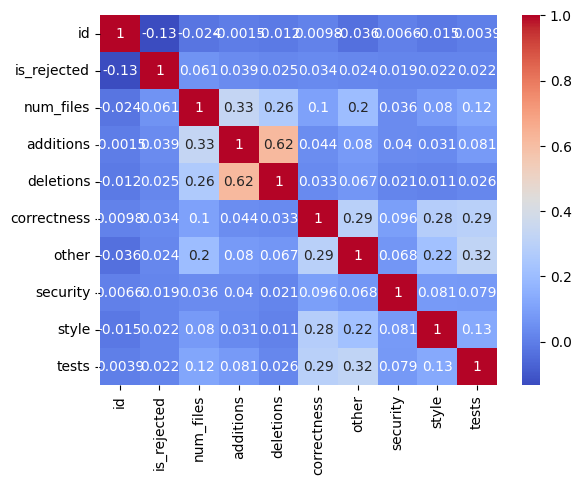

In [15]:
# correlation heatmap

import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [16]:
# simple rules mining with mlxtend association rules

# convert features to binary
df['large_patch'] = (df['additions'] + df['deletions']) > 200
df['many_files'] = df['num_files'] > 5
df['has_tests_comments'] = df['tests'] > 0
df['has_correctness_comments'] = df['correctness'] > 0
df['has_style_comments'] = df['style'] > 0
df['has_security_comments'] = df['security'] > 0

In [17]:
# convert to boolean
basket = df[[
    'is_rejected',
    'large_patch',
    'many_files',
    'touches_risky',
    'has_tests_comments',
    'has_correctness_comments',
    'has_style_comments',
    'has_security_comments'
]].astype(bool)

In [18]:
# run Apriori to find frequent feature sets
from mlxtend.frequent_patterns import apriori, association_rules

frequent = apriori(basket, min_support=0.1, use_colnames=True)
frequent.head()

,support,itemsets
0,0.285213,(is_rejected)
1,0.346648,(large_patch)
2,0.404602,(many_files)
3,0.117514,(touches_risky)
4,0.128825,"(is_rejected, large_patch)"


In [19]:
# generate association rules for rejection patterns
rules = association_rules(frequent, metric="confidence", min_threshold=0.6)
rules = rules.sort_values("confidence", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,"(is_rejected, large_patch)",(many_files),0.128825,0.404602,0.105697,0.820471,2.027849,1.0,0.053574,3.316453,0.581820,0.247112,0.698473,0.540854
1,(large_patch),(many_files),0.346648,0.404602,0.277027,0.799159,1.975173,1.0,0.136772,2.964518,0.755666,0.584170,0.662677,0.741925
2,"(many_files, is_rejected)",(large_patch),0.139987,0.346648,0.105697,0.755050,2.178143,1.0,0.057171,2.667285,0.628936,0.277465,0.625087,0.529981
0,(many_files),(large_patch),0.404602,0.346648,0.277027,0.684691,1.975173,1.0,0.136772,2.072097,0.829219,0.584170,0.517397,0.741925
